In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
#loading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine <- read_csv2(file = url, col_names = TRUE)
red_wine

url2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine <- read_csv2(file = url2, col_names = TRUE)
white_wine

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `fixed acidity` = col_number(),
  `volatile acidity` = col_character(),
  `citric acid` = col_character(),
  `residual sugar` = col_number(),
  chlorides = col_character(),
  `free sulfur dioxide` = col_number(),
  `total sulfur dioxide` = col_double(),
  density = col_character(),
  pH = col_number(),
  sulphates = col_character(),
  alcohol = col_number(),
  quality = col_double()
)

Warning message:
“2 parsing failures.
 row                  col               expected actual                                                                                         file
1296 total sulfur dioxide no trailing characters     .5 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
1297 total sulfur dioxide no trailing characters     .5 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
”

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `fixed acidity` = col_number(),
  `volatile acidity` = col_character(),
  `citric acid` = col_character(),
  `residual sugar` = col_character(),
  chlorides = col_character(),
  `free sulfur dioxide` = col_number(),
  `total sulfur dioxide` = col_number(),
  density = col_character(),
  pH = col_number(),
  sulphates = col_character(),
  alcohol = col_number(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6


Selecting our parameters

We could start by creating a scatterplot of each variable against the quality/classification metric we've created and see which variables have the strongest relationship as an indicator of what parameters will be most important for our model.

A more precise approach would be using feature selection, which will rank the most relevant variables to prediting quality

In [8]:
# Making the quality binary
white_wine_binary <- white_wine %>%
    mutate(binary_quality = if_else(quality < 6, 0, 1))

red_wine_binary <- red_wine %>%
    mutate(binary_quality = if_else(quality < 6, 0, 1))

white_wine_binary
red_wine_binary

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,1
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,1
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,1
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7,1
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6,1


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,0
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,0
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6,1
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5,0
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6,1


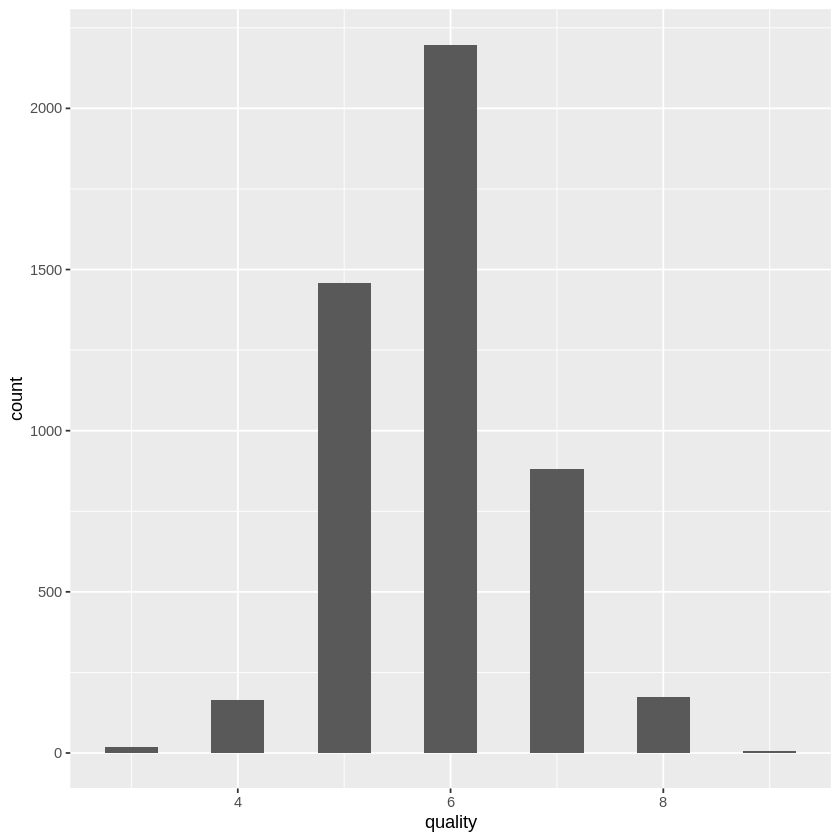

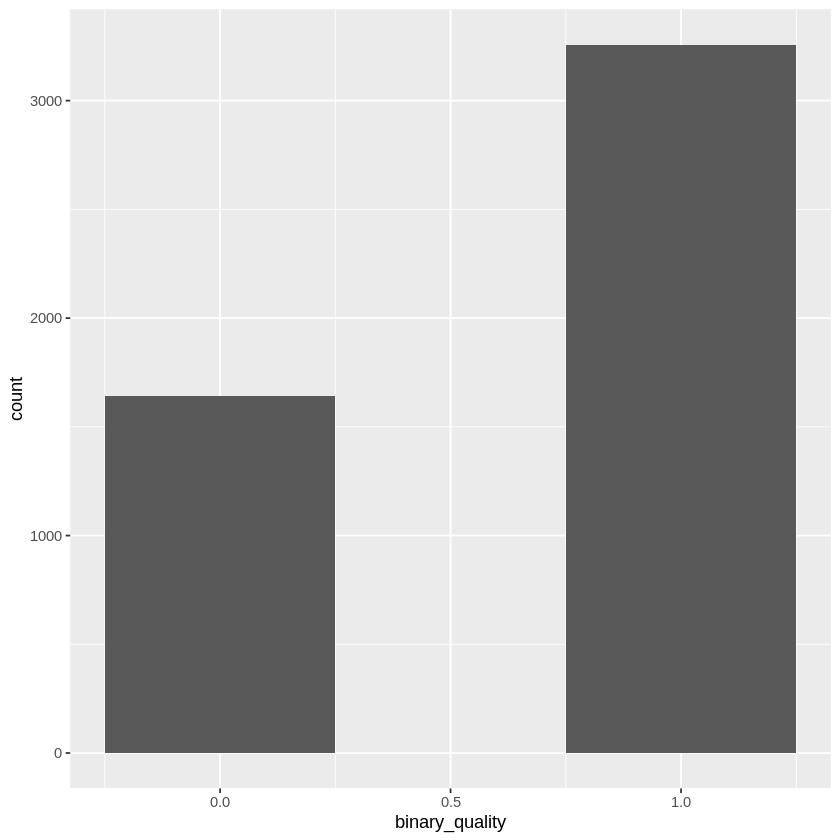

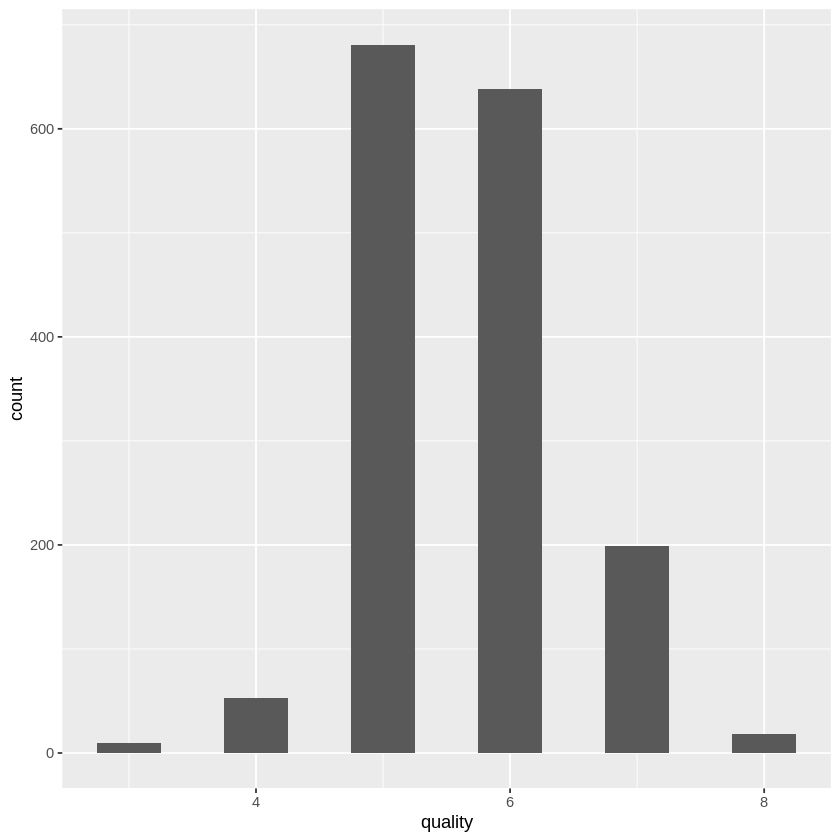

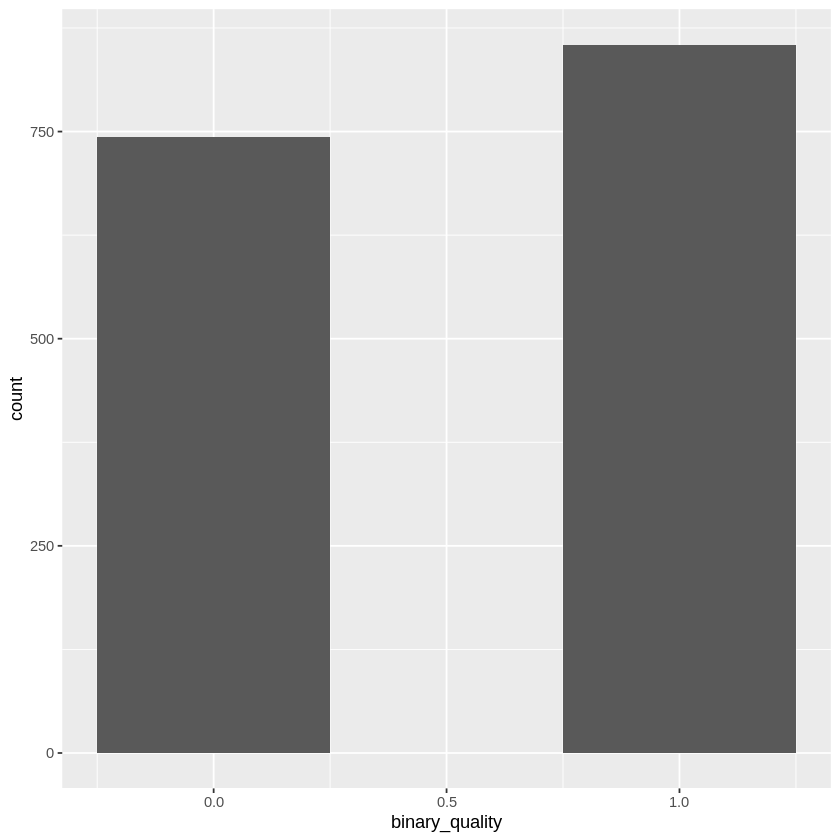

In [14]:
## Visualizing binary quality distributions
white_wine_plot <- ggplot(white_wine, aes(x=quality)) + geom_histogram(binwidth=0.5)
white_wine_plot

white_wine_plot_binary <- ggplot(white_wine_binary, aes(x=binary_quality)) + geom_histogram(binwidth=0.5)
white_wine_plot_binary

red_wine_plot <- ggplot(red_wine, aes(x=quality)) + geom_histogram(binwidth=0.5)
red_wine_plot

red_wine_plot_binary <- ggplot(red_wine_binary, aes(x=binary_quality)) + geom_histogram(binwidth=0.5)
red_wine_plot_binary

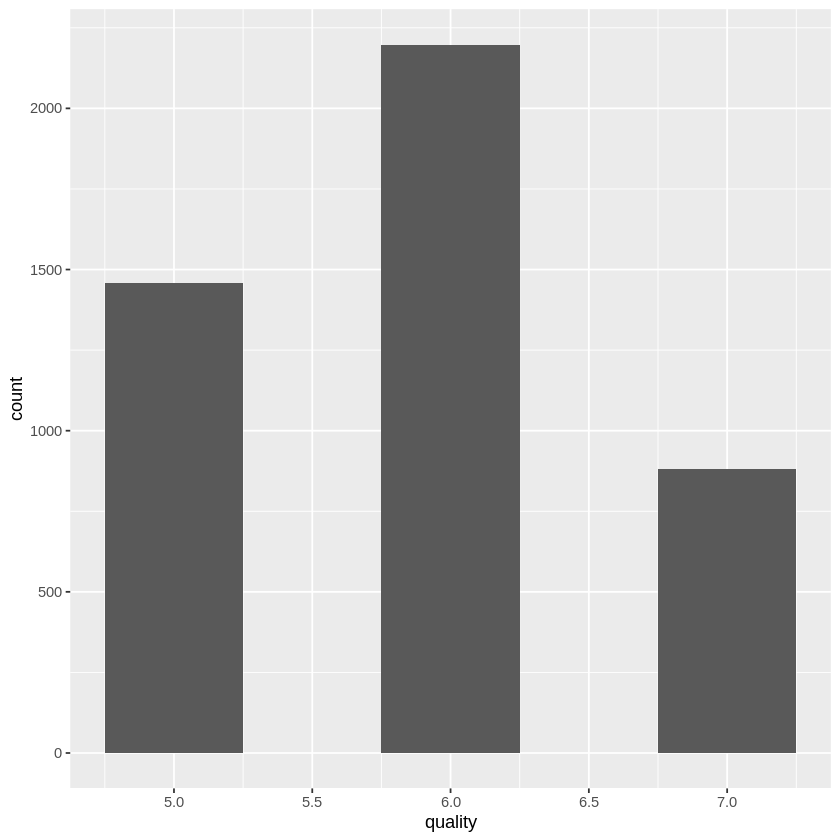

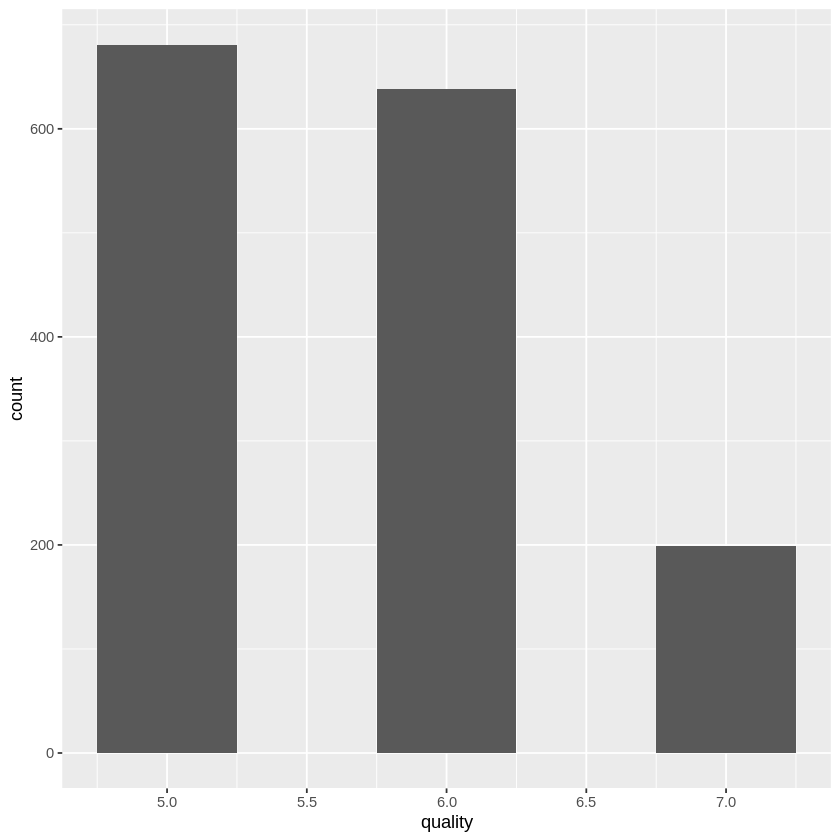

In [22]:
# Visualizing distributions with three categorical variables
white_wine_filtered <- white_wine %>%
    filter(quality >= 5, quality <= 7)

red_wine_filtered <- red_wine %>%
    filter(quality >= 5, quality <= 7)

white_wine_filtered_plot <- ggplot(white_wine_filtered, aes(x=quality)) + geom_histogram(binwidth=0.5)
white_wine_filtered_plot

red_wine_filtered_plot <- ggplot(red_wine_filtered, aes(x=quality)) + geom_histogram(binwidth=0.5)
red_wine_filtered_plot